In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from pandas import DataFrame, Series  # for convenience
from scipy.misc import imsave
import pims
import trackpy as tp
from pims import Frame
from scipy.misc import imsave
from scipy.misc import imread
import math
picL = 18333
picR = 18158
v0L = imread('./frame_18333_sum.tif')
v0R = imread('./frame_18158_sum.tif')
TrackL = pd.read_csv('ImageJ_L_v2.csv')
TrackR = pd.read_csv('ImageJ_R_v2.csv')
TrackL['POSITION_X'] = TrackL['POSITION_X']*100
TrackR['POSITION_X'] = TrackR['POSITION_X']*100
TrackL['POSITION_Y'] = TrackL['POSITION_Y']*100
TrackR['POSITION_Y'] = TrackR['POSITION_Y']*100
TrackL['Time'] = TrackL['FRAME']*0.0001
TrackR['Time'] = TrackR['FRAME']*0.0001
TrackL.columns

Index([u' ', u'Label', u'ID', u'TRACK_ID', u'QUALITY', u'POSITION_X',
       u'POSITION_Y', u'POSITION_Z', u'POSITION_T', u'FRAME', u'RADIUS',
       u'VISIBILITY', u'MANUAL_COLOR', u'MEAN_INTENSITY', u'MEDIAN_INTENSITY',
       u'MIN_INTENSITY', u'MAX_INTENSITY', u'TOTAL_INTENSITY',
       u'STANDARD_DEVIATION', u'ESTIMATED_DIAMETER', u'CONTRAST', u'SNR',
       u'Time'],
      dtype='object')

In [19]:
TrackL.head()

,,Label,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,FRAME,...,MEAN_INTENSITY,MEDIAN_INTENSITY,MIN_INTENSITY,MAX_INTENSITY,TOTAL_INTENSITY,STANDARD_DEVIATION,ESTIMATED_DIAMETER,CONTRAST,SNR,Time
0,1,ID2269166,2269166,0,0.301,25597.9,11755.7,0,0,0,...,0.0,0,0,0,0,0.000,0.1,NaN,NaN,0.0000
1,2,ID2269015,2269015,0,24.352,25984.9,12031.2,0,1,1,...,222.2,255,91,255,1111,73.343,0.1,0.019,0.112,0.0001
2,3,ID2269116,2269116,0,23.954,25886.3,12016.4,0,2,2,...,225.8,255,109,255,1129,65.293,0.1,-0.061,-0.447,0.0002
3,4,ID2268962,2268962,0,17.824,25863.7,11850.7,0,3,3,...,178.6,182,73,255,893,79.682,0.1,-0.069,-0.331,0.0003
4,5,ID2268964,2268964,0,21.531,25832.8,12034.5,0,3,3,...,182.2,219,0,255,911,106.244,0.1,0.026,0.087,0.0003


In [20]:
TrackL['TRACK_ID'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

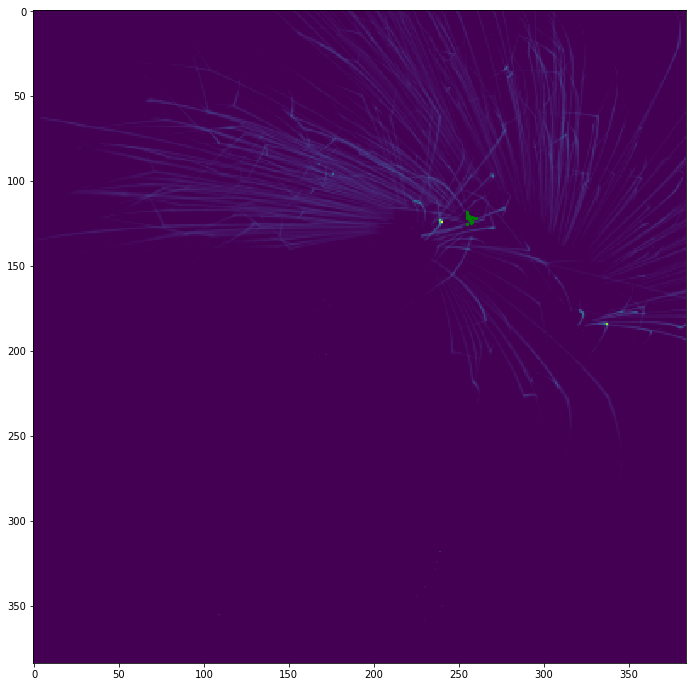

In [33]:
TL1 = TrackL[TrackL['TRACK_ID'] == 2]
plt.figure(figsize=(12,12))
plt.imshow(v0L) 
plt.scatter(TL1['POSITION_X']/100,TL1['POSITION_Y']/100,s=5,c='g')
plt.savefig('trackL_ImageJ_{}.tif'.format(1  ))
plt.show() 

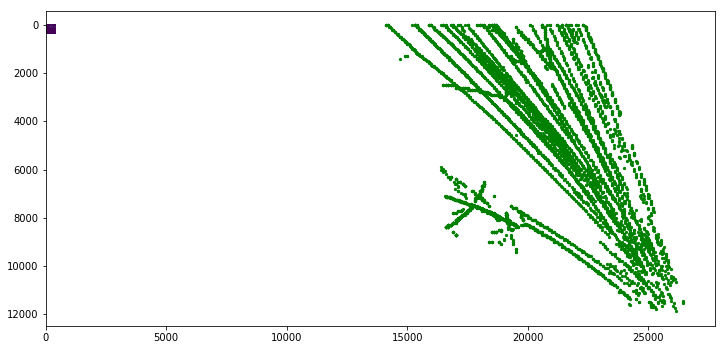

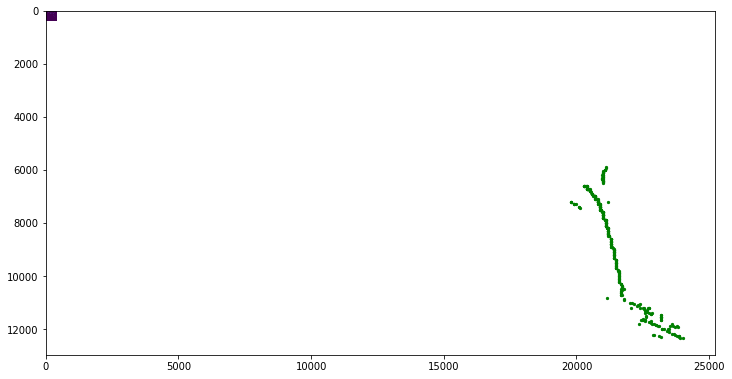

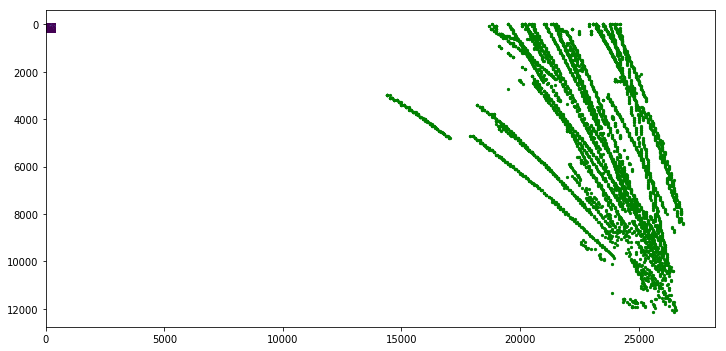

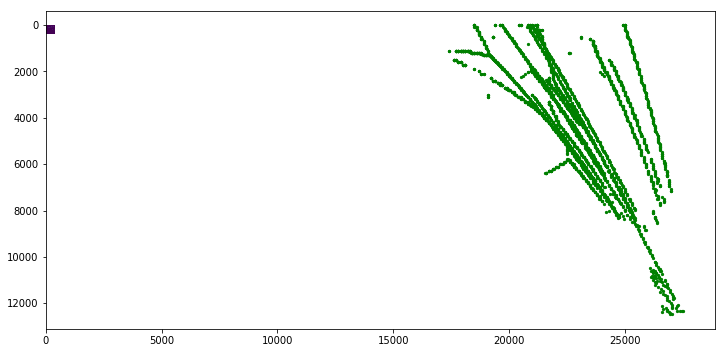

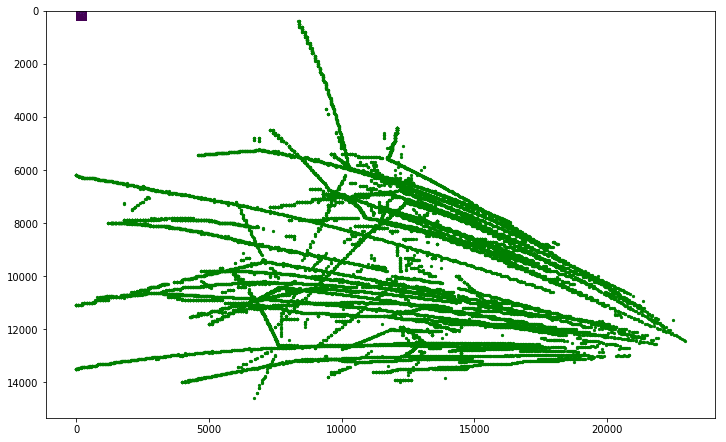

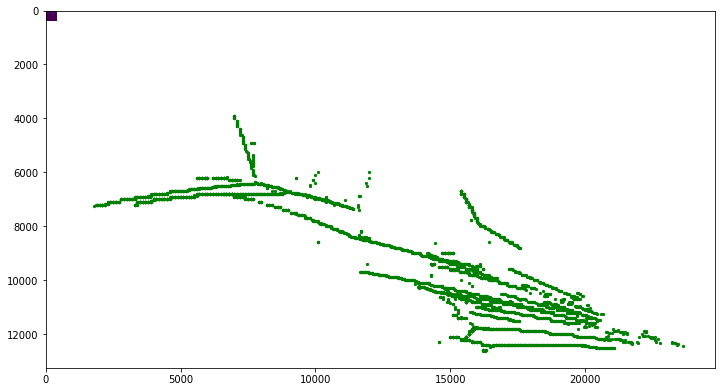

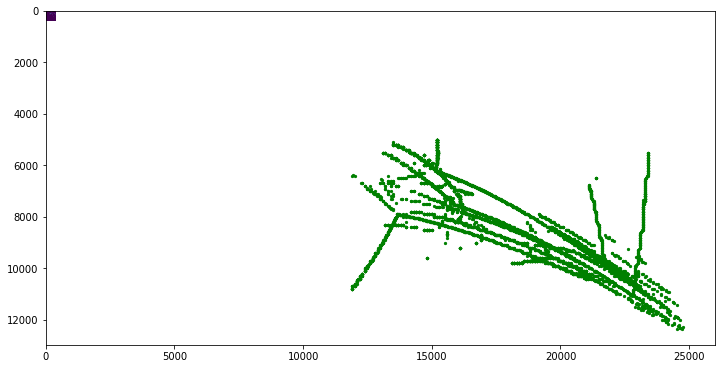

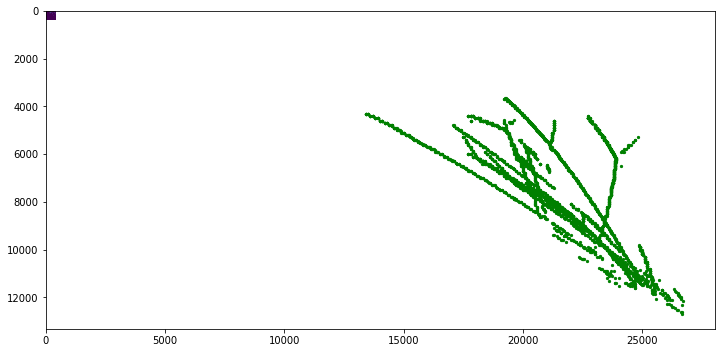

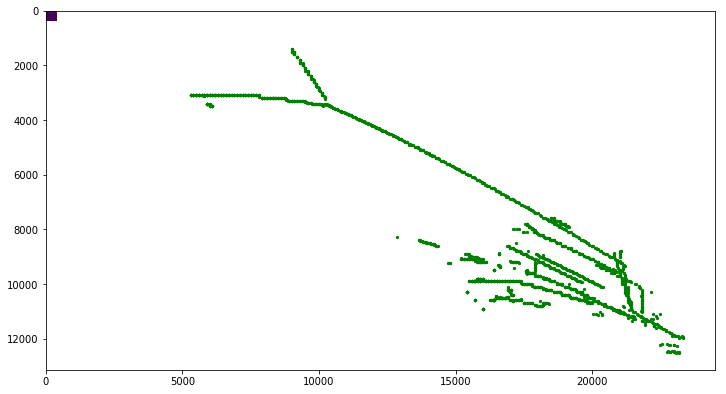

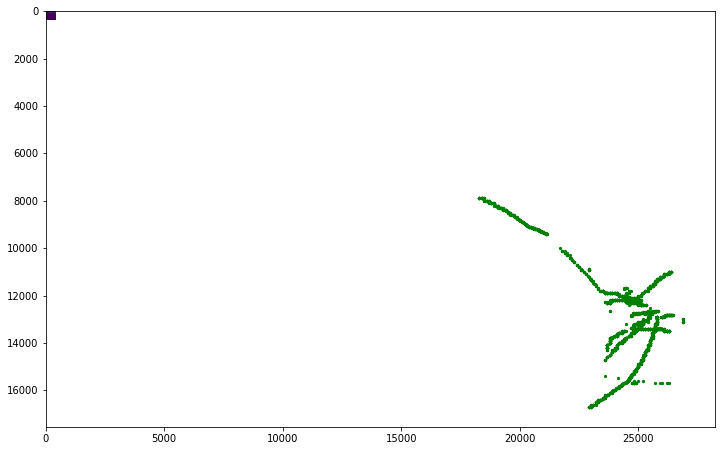

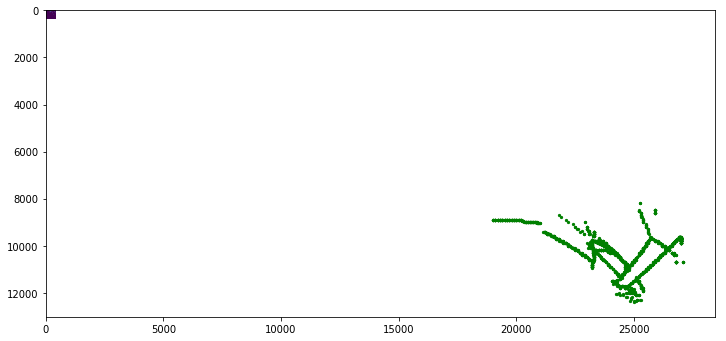

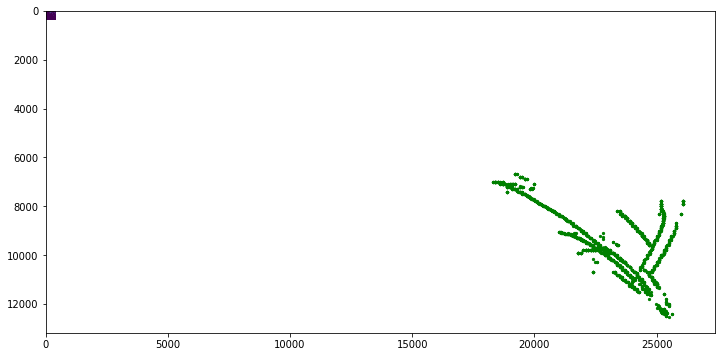

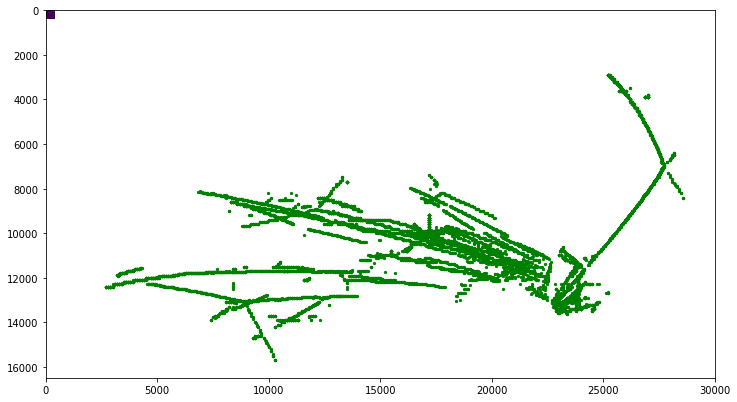

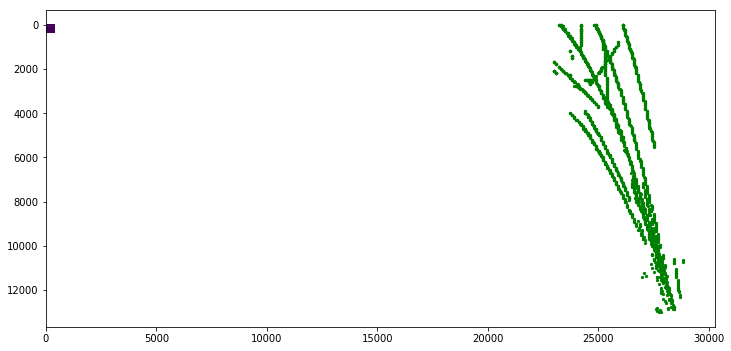

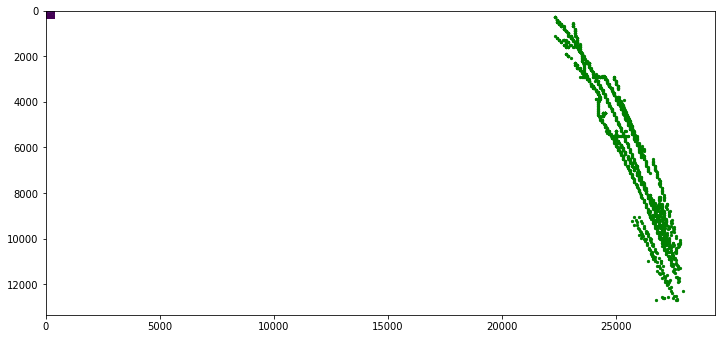

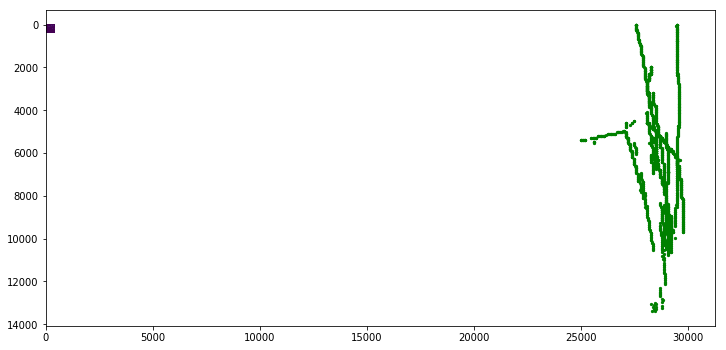

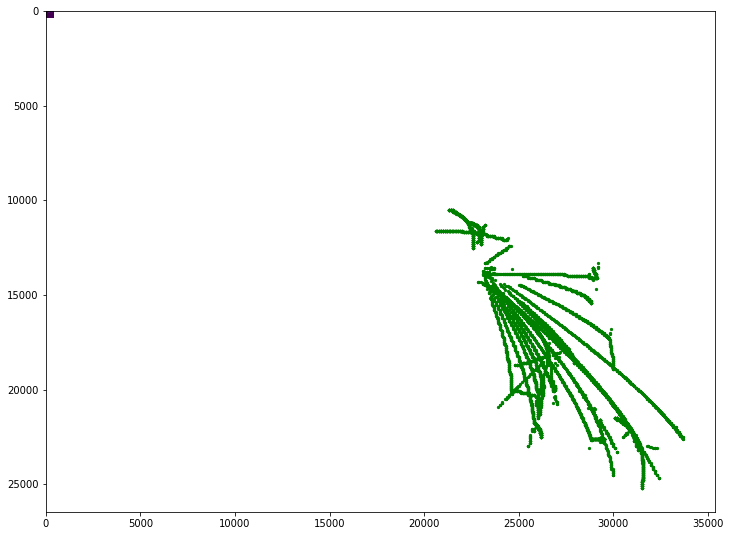

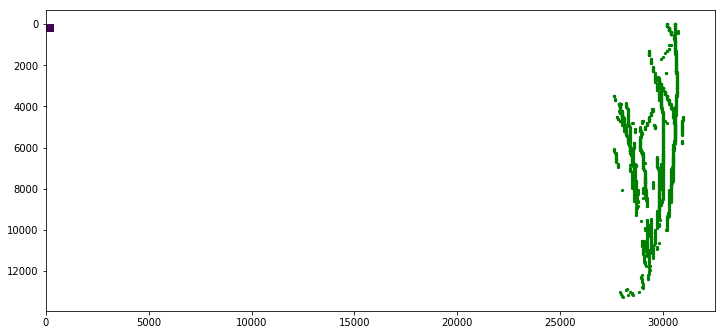

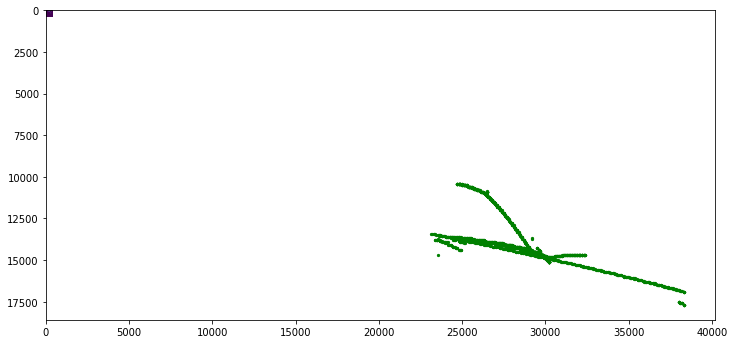

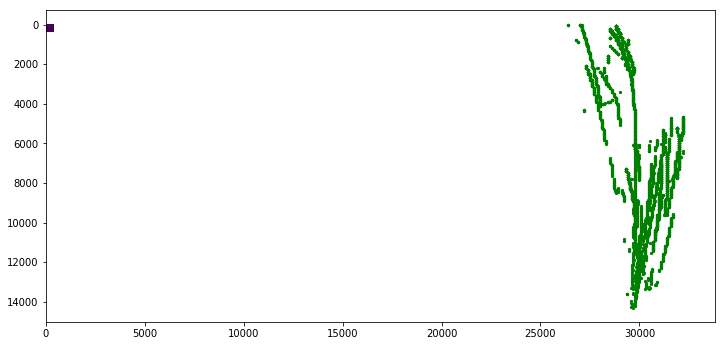

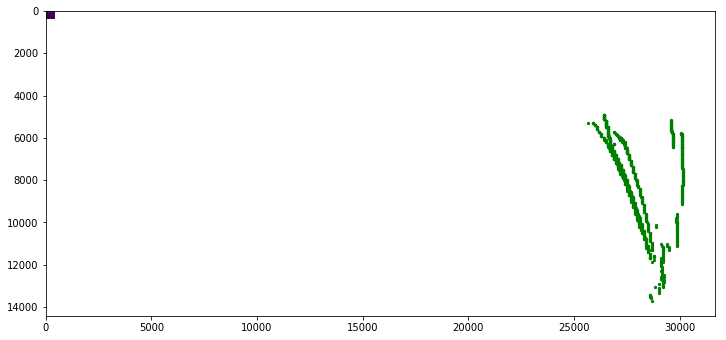

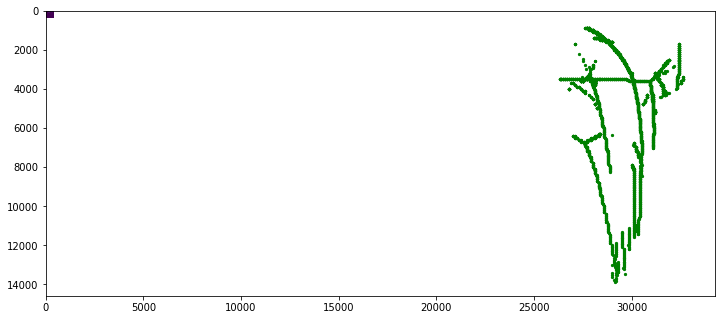

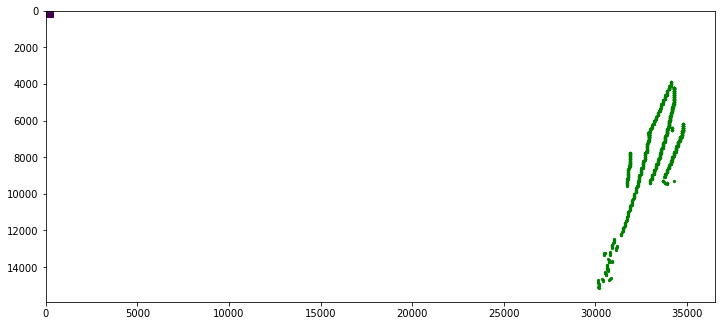

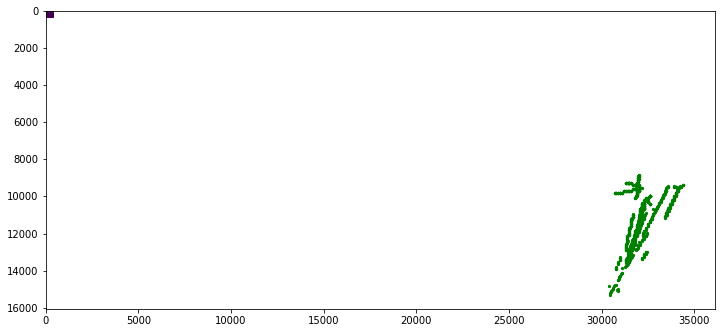

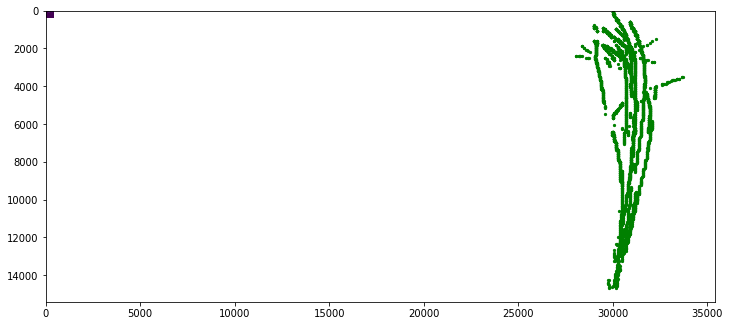

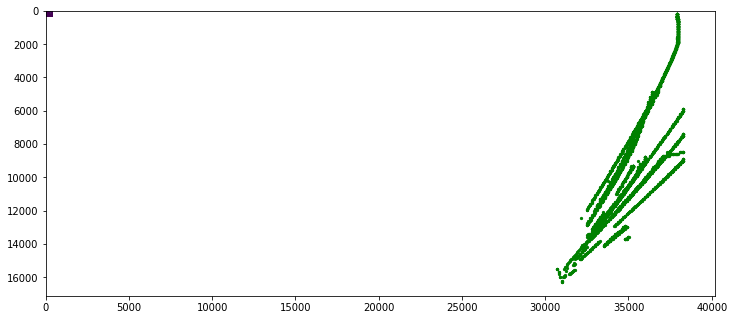

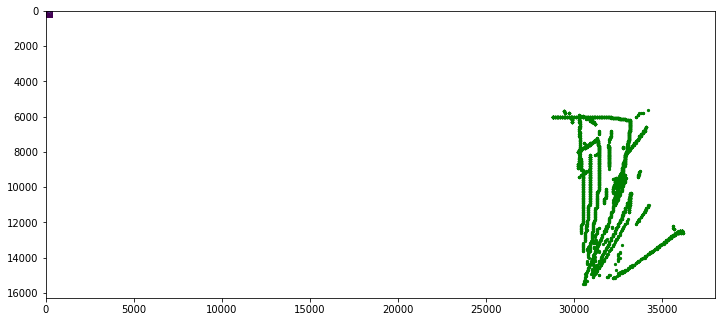

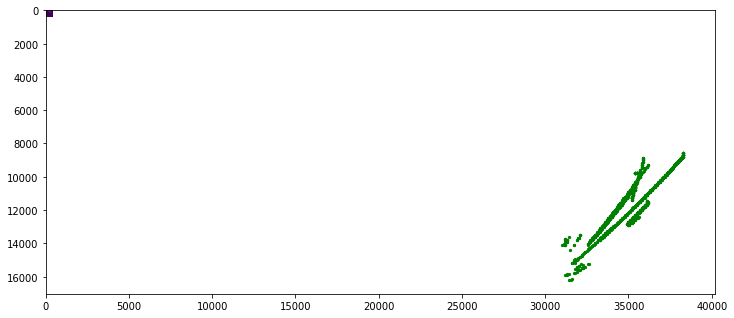

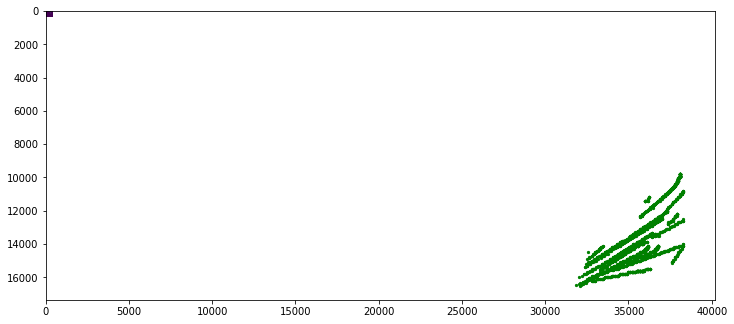

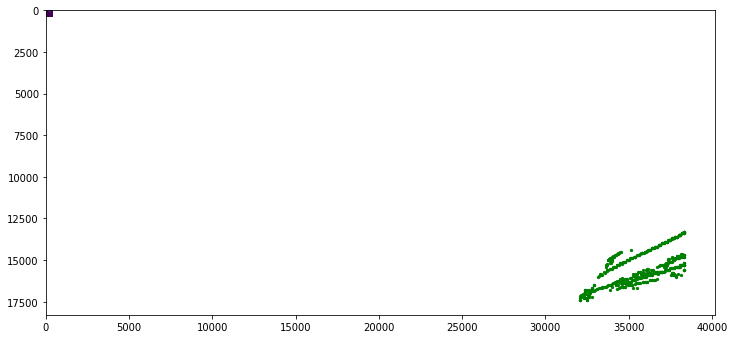

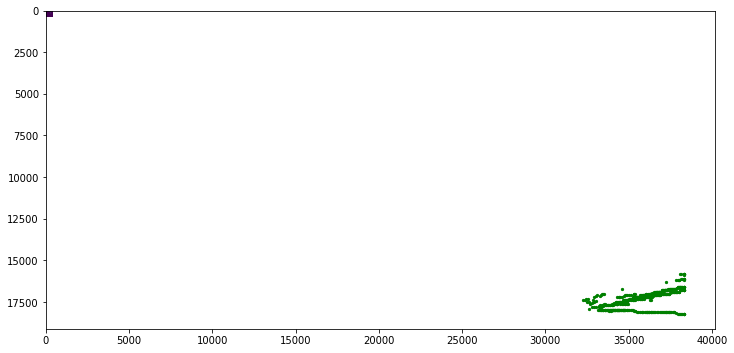

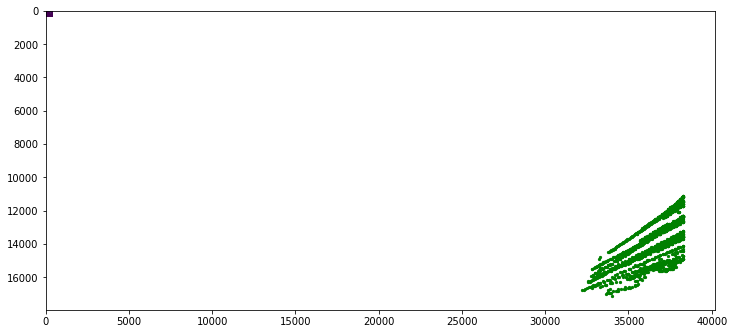

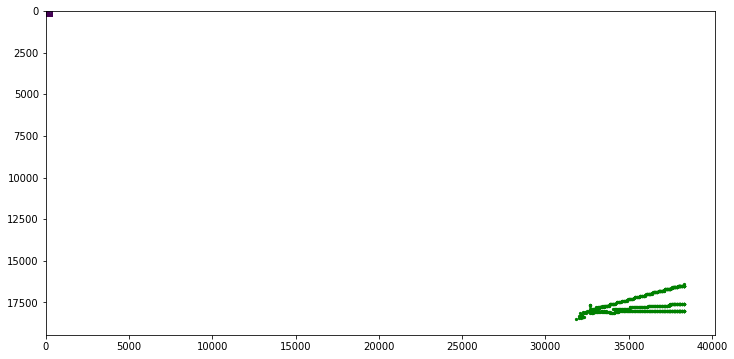

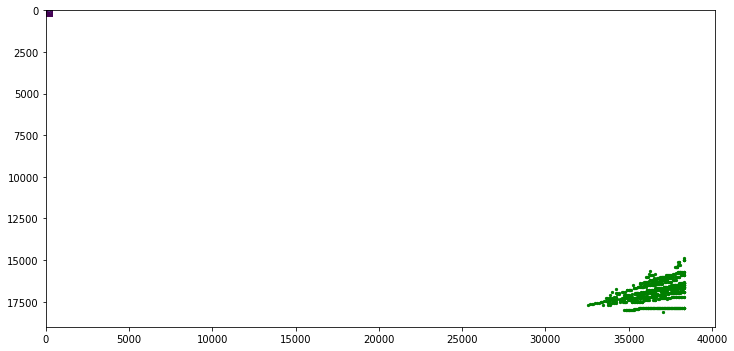

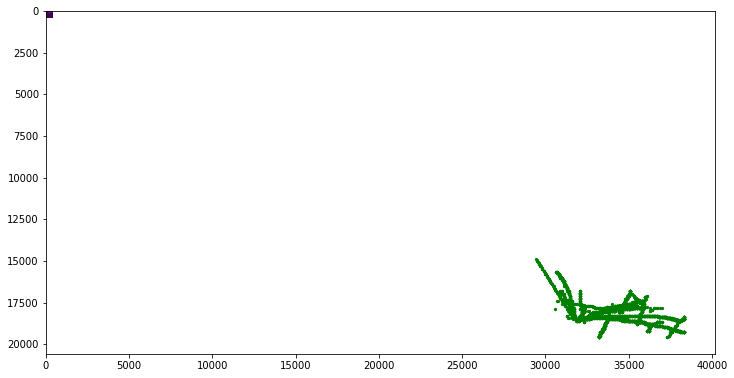

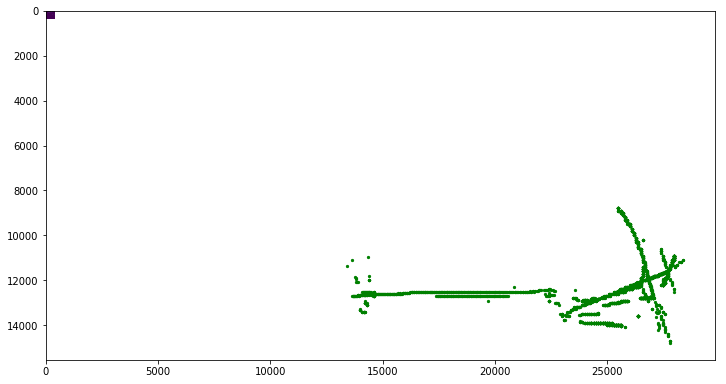

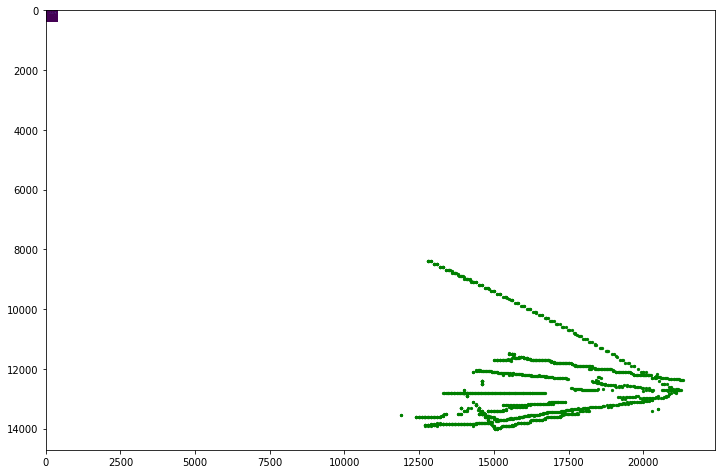

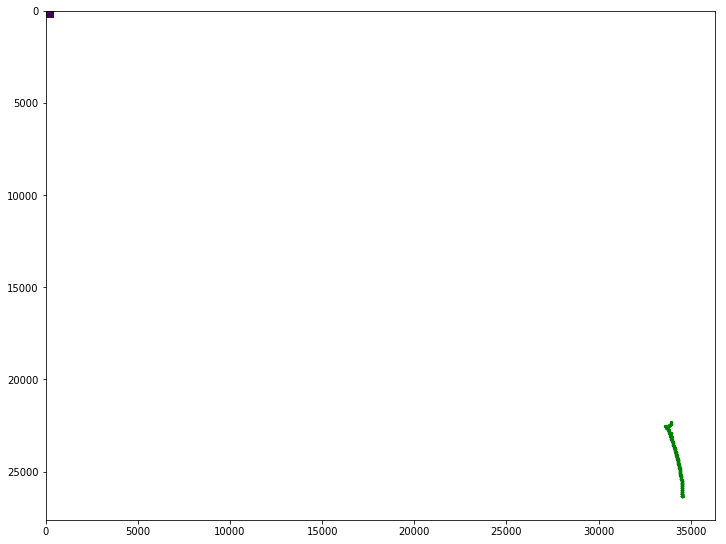

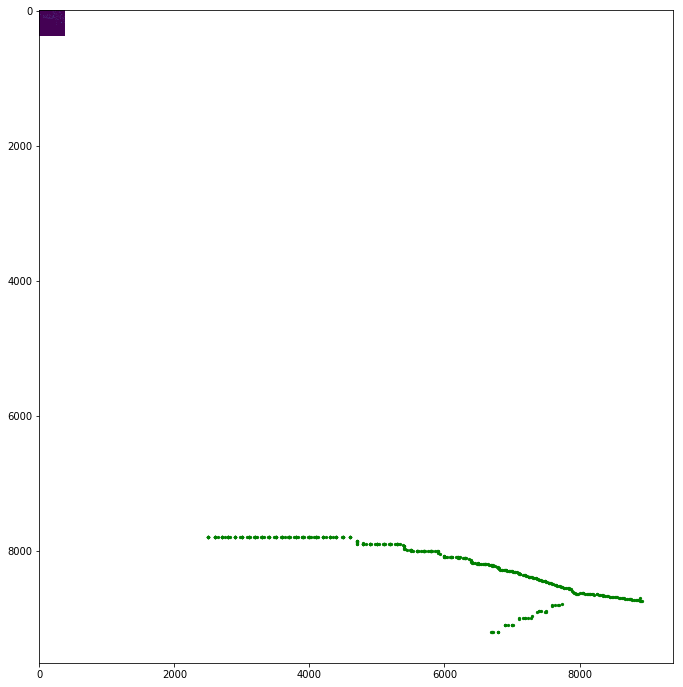

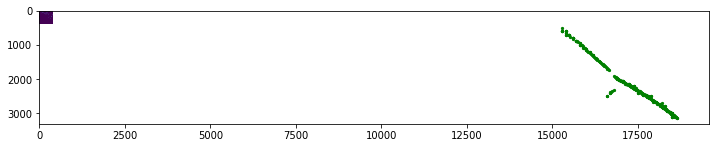

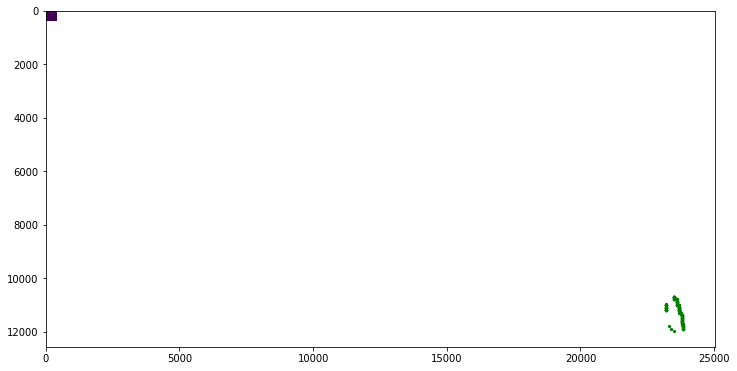

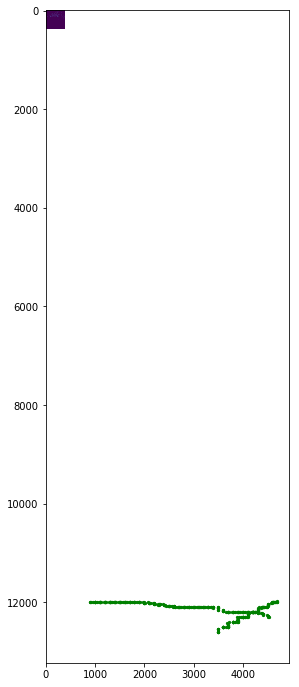

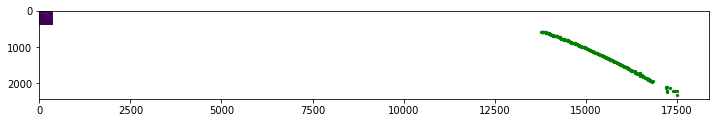

In [21]:
#for ii in range(300,310):
filter1 =[]
for ii in TrackL['TRACK_ID'].unique():
    TL1 = TrackL[TrackL['TRACK_ID'] == ii]
    XL = TL1['POSITION_X']
    YL = TL1['POSITION_Y']
    TL = TL1['Time']
    AL = TL1['MEAN_INTENSITY']
    points = len(TL1)
    if(points>200):
        filter1.append(ii)
filter1
for ii in filter1:
    TL1 = TrackL[TrackL['TRACK_ID'] == ii]
    XL = TL1['POSITION_X']
    YL = TL1['POSITION_Y']
    TL = TL1['Time']
    AL = TL1['MEAN_INTENSITY']
    points = len(TL1)
    plt.figure(figsize=(12,12))
    plt.imshow(v0L)    
    plt.scatter(XL,YL,s=5,c='g')
    plt.savefig('trackL_ImageJ_{}.tif'.format(ii))
    plt.show() 

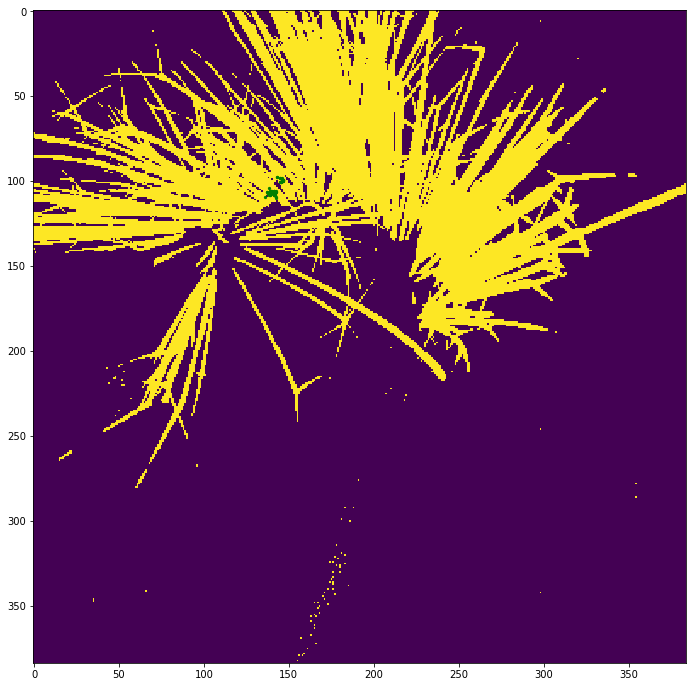

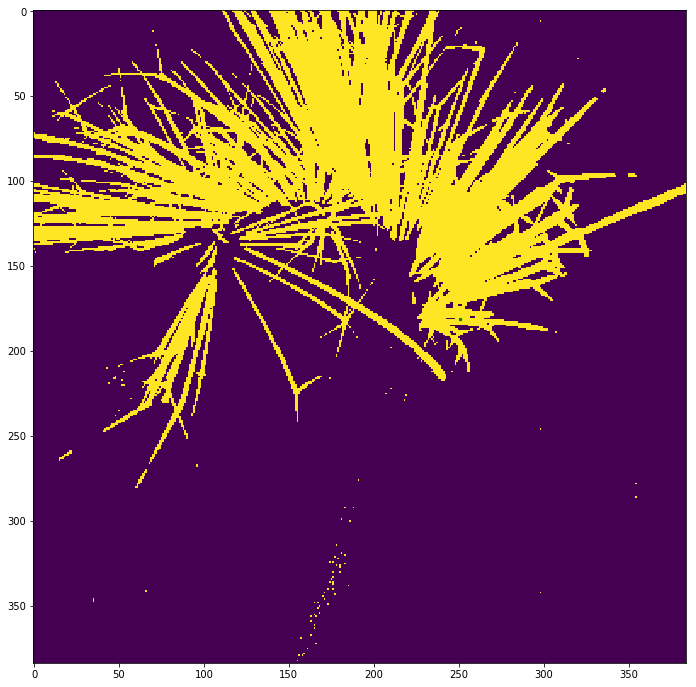

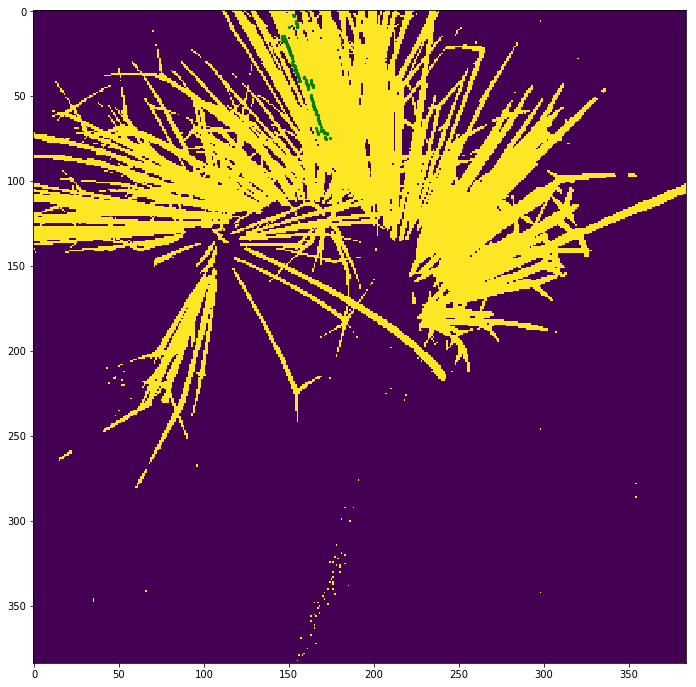

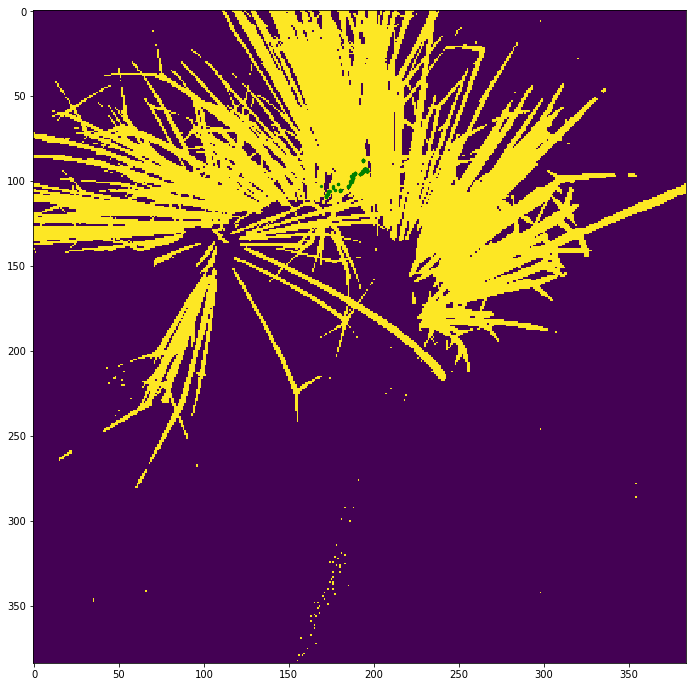

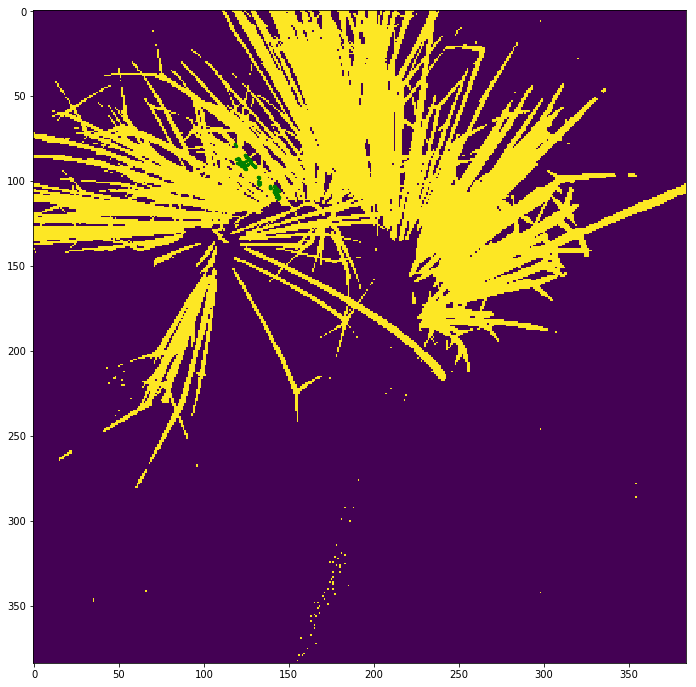

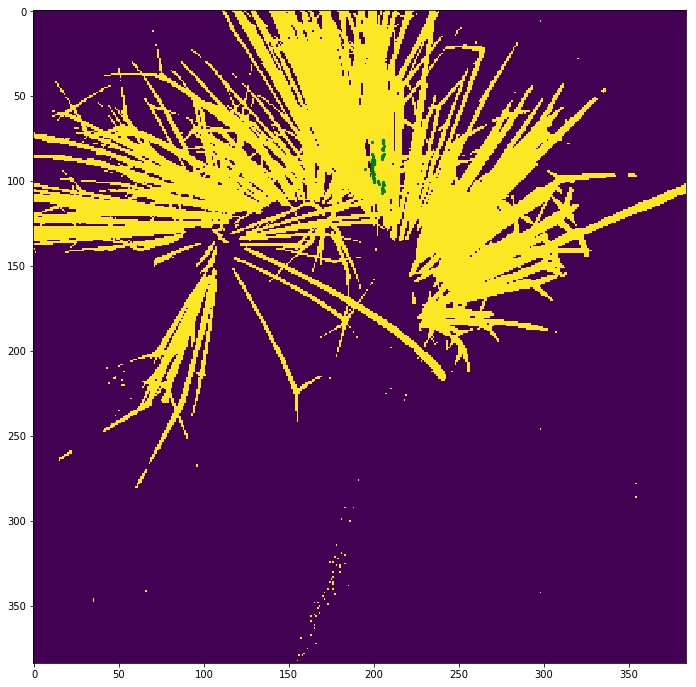

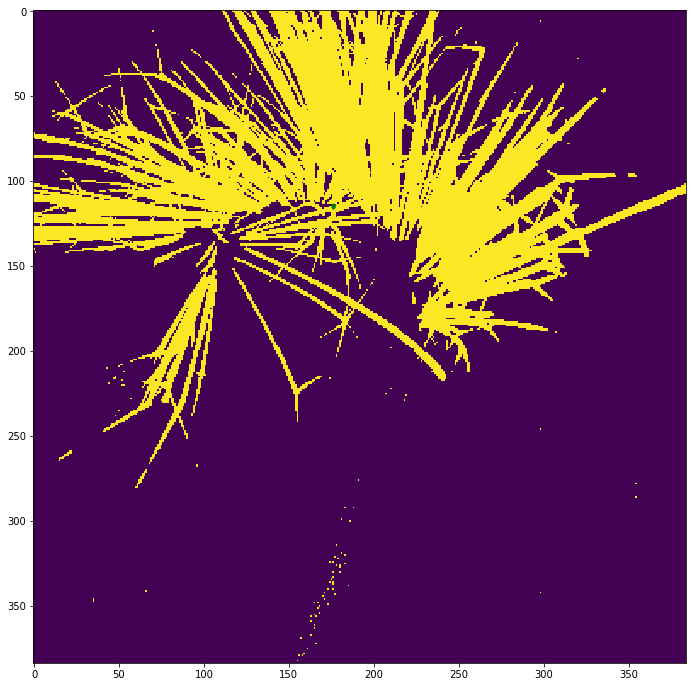

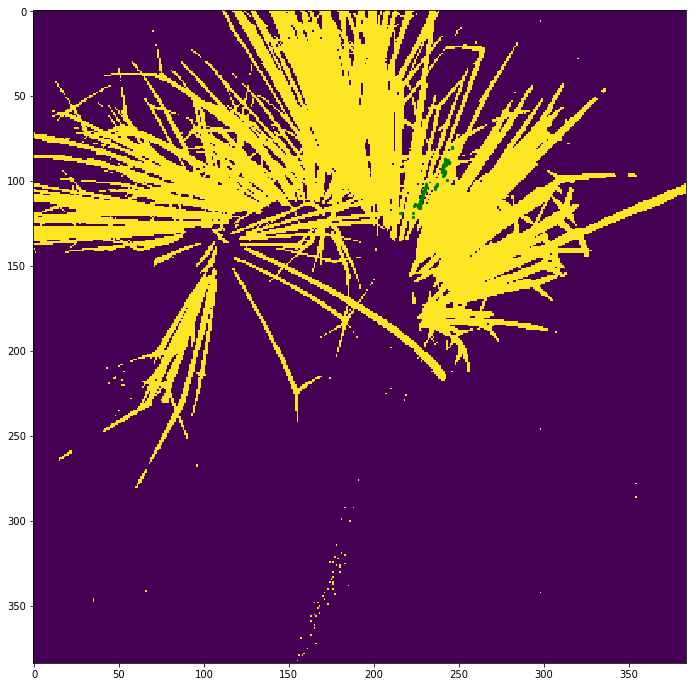

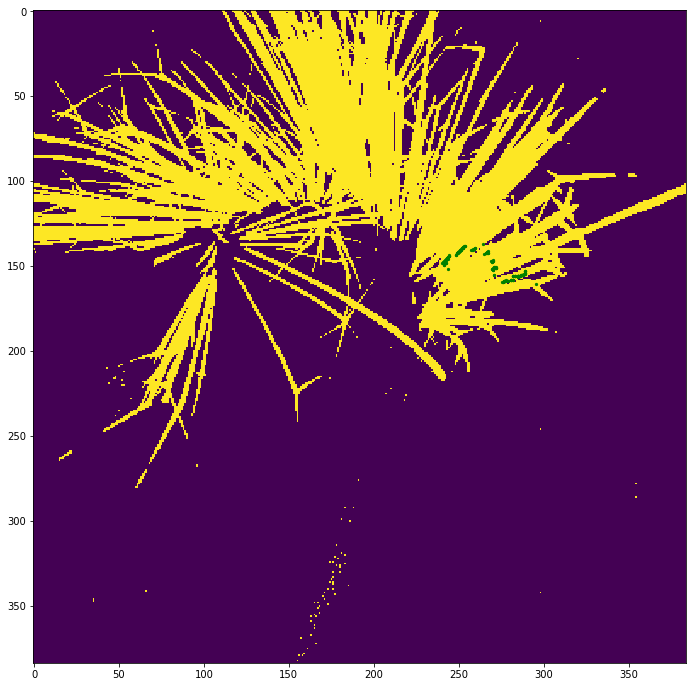

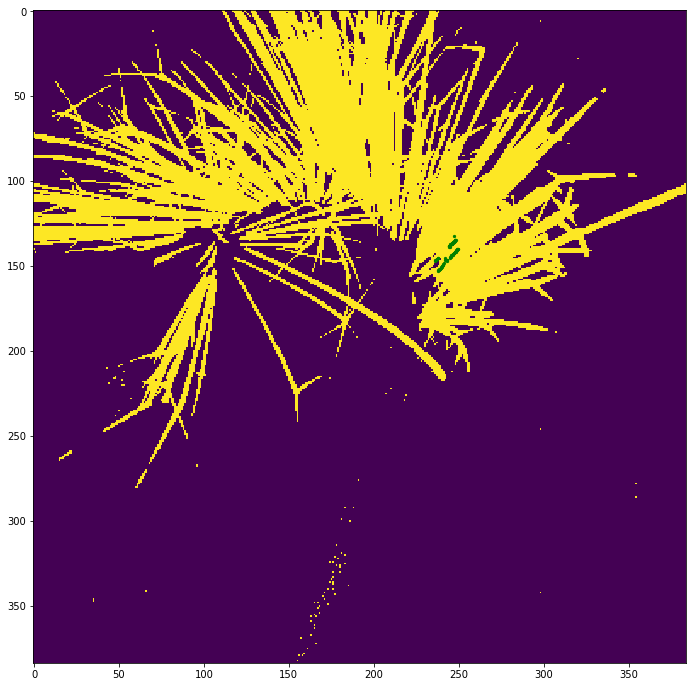

In [6]:
#for ii in range(300,310):
for ii in TrackR['TRACK_ID'].unique():
    TR1 = TrackR[TrackR['TRACK_ID'] == ii]
    XR = TR1['POSITION_X']
    YR = TR1['POSITION_Y']
    TR = TR1['Time']
    AR = TR1['MEAN_INTENSITY']
    
    plt.figure(figsize=(12,12))
    plt.imshow(FrameRSum[0])    
    plt.scatter(XR,YR,s=5,c='g')
    plt.savefig('trackR_{}.tif'.format(ii))
    plt.show() 

In [7]:
TR1 = TrackR[TrackR['TRACK_ID'] == 300]

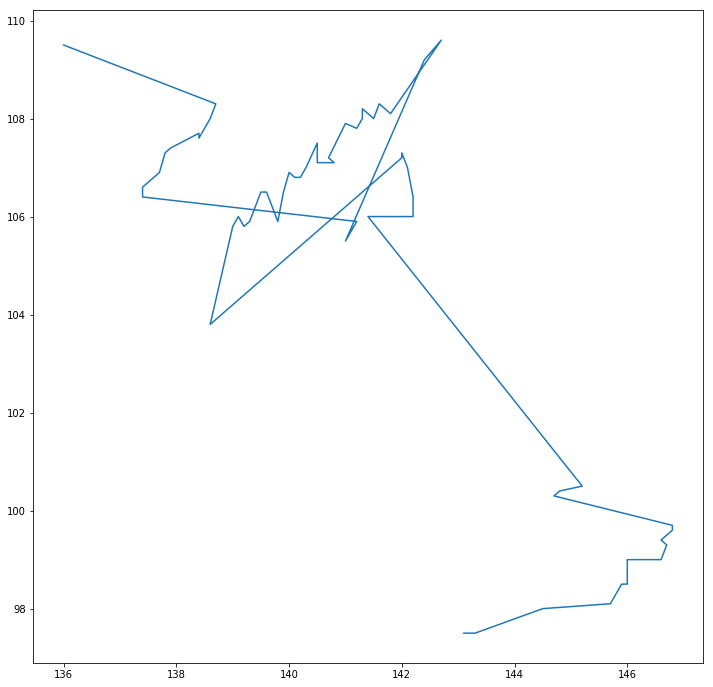

In [8]:
plt.figure(figsize=(12,12))
plt.plot(TR1['POSITION_X'],TR1['POSITION_Y'])
plt.show()